In [1]:
import os
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import seaborn as sns
from tesser import fit
from tesser import util
from tesser import sr

In [2]:
data_dir = '/Users/morton/Dropbox/data/tesser'
induct_all = util.load_induct(data_dir)

In [3]:
m_induct = induct_all.groupby(['SubjNum', 'QuestType'], as_index=False).mean()
m_induct.pivot(index='SubjNum', columns='QuestType', values='Acc')

QuestType,Bound1,Bound2,Prim
SubjNum,,,
100,0.333333,0.666667,0.333333
101,0.666667,0.500000,0.533333
102,0.833333,0.666667,0.866667
103,0.500000,0.666667,0.600000
104,0.333333,0.666667,0.500000
105,0.833333,1.000000,0.666667
106,0.333333,1.000000,0.633333
108,0.333333,0.666667,0.566667
109,0.833333,0.500000,0.833333


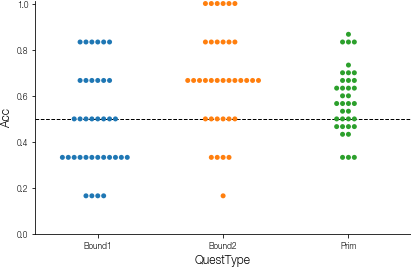

In [4]:
# performance for each subject on each question type
ax = sns.swarmplot(x='QuestType', y='Acc', data=m_induct)
h = ax.set_ylim(0, 1.01)
xlim = ax.get_xlim()
h = ax.hlines(.5, xlim[0], xlim[1], linestyles='dashed')

In [5]:
subject = 135
struct = util.load_struct_df_all(data_dir, subject)
induct = util.load_induct_df_all(data_dir, subject)
induct.groupby('QuestType').mean().loc[:, ['Acc', 'RT']]

,Acc,RT
QuestType,,
Bound1,0.833333,3.573066
Bound2,0.833333,5.013019
Prim,0.833333,3.849970


In [6]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
param, logl = fit.fit_induct(struct, induct, fixed, var_names, 
                             var_bounds, verbose=True)
param

differential_evolution step 1: f(x)= 18.6835
differential_evolution step 2: f(x)= 18.6835
differential_evolution step 3: f(x)= 18.0192
differential_evolution step 4: f(x)= 17.917
differential_evolution step 5: f(x)= 17.9031
differential_evolution step 6: f(x)= 17.9031
differential_evolution step 7: f(x)= 17.8945
differential_evolution step 8: f(x)= 17.8355
differential_evolution step 9: f(x)= 17.8355
differential_evolution step 10: f(x)= 17.8355
differential_evolution step 11: f(x)= 17.8355


{'gamma': 0.7971974316248921,
 'alpha': 0.13629430997883424,
 'tau': 2.1746719183846923}

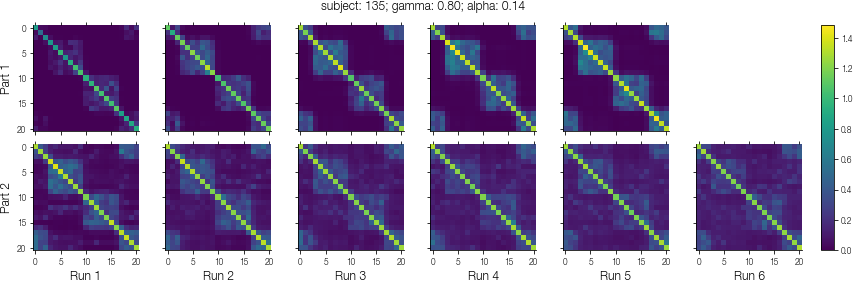

In [7]:
srm = sr.learn_sr(struct, param['gamma'], param['alpha'])
fig = sr.plot_sr(srm, str(subject), gamma=param['gamma'], alpha=param['alpha'])